# Introduction
<hr style = "border:2px solid black" ></hr>

In [ ]:
"""
What? SVM for face recognition
"""

# Import modules
<hr style = "border:2px solid black" ></hr>

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Dataset
<hr style = "border:2px solid black" ></hr>

In [ ]:
"""
Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures.
"""

In [3]:
faces = fetch_lfw_people(min_faces_per_person=60) 
print(faces.target_names) 
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


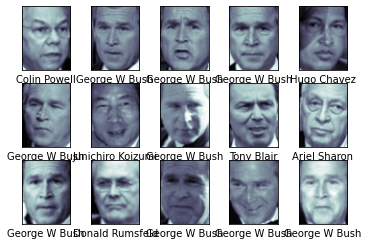

In [6]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

# PCA - Principal Component Analysis
<hr style = "border:2px solid black" ></hr>

In [ ]:
"""
Each image contains [62×47] or nearly 3,000 pixels. We could proceed by simply using each pixel value as a
feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features;
here we will use a PCA to extract 150 fundamental components to feed into our support vector machine classifier.
"""

In [13]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

# Training
<hr style = "border:2px solid black" ></hr>

In [ ]:
"""
We are going to use grid search with no k-fold so we still need to have both training and test sets.
"""

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                            random_state=42)

In [ ]:
"""
We can use a grid search cross-validation to explore combinations of parame‐ ters. Here we will adjust C 
(which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel),
and determine the best model:
"""

In [18]:
param_grid = {'svc__C': [1, 5, 10, 50],
             'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

In [19]:
%time grid.fit(Xtrain, ytrain) 
print(grid.best_params_)

CPU times: user 1min 57s, sys: 23.7 s, total: 2min 20s
Wall time: 25.1 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [ ]:
"""
The optimal values fall toward the middle of our grid; if they fell at the edges, we would want to expand 
the grid to make sure we have found the true optimum.
Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen.
"""

In [20]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

In [ ]:
"""
Let’s take a look at a few of the test images along with their predicted values
"""

# Post-processing
<hr style = "border:2px solid black" ></hr>

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

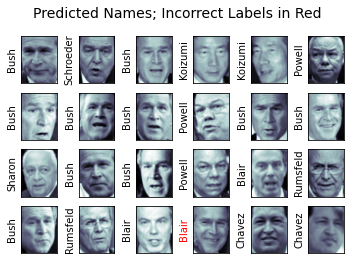

In [21]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
                axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
                axi.set(xticks=[], yticks=[])
                axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                color='black' if yfit[i] == ytest[i] else 'red') 
                
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [ ]:
"""
Out of this small sample, our optimal estimator mislabeled only a single face (Bush’s face in the bottom row 
was mislabeled as Blair). We can get a better sense of our esti‐ mator’s performance using the classification 
report, which lists recovery statistics label by label:
"""

In [23]:
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [ ]:
"""
Or even more intuitively 
"""

Text(91.68, 0.5, 'predicted label')

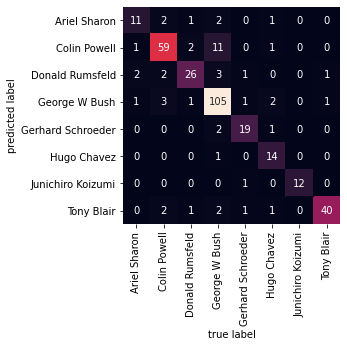

In [27]:
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                        xticklabels=faces.target_names,
                        yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# References
<hr style = "border:2px solid black" ></hr>

- VanderPlas, Jake. Python data science handbook: Essential tools for working with data. O'Reilly Media, Inc.", 2016.
- https://github.com/jakevdp/PythonDataScienceHandbook